In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/5 семестр. Машинное обучение'

/content/drive/MyDrive/Colab Notebooks/5 семестр. Машинное обучение


In [ ]:
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset='all')
print(news.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [ ]:
news.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#n_examples = 1000
categories = news.target_names
#categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

newsgroups, result = fetch_20newsgroups(subset = 'all', shuffle = True, random_state = 11, 
                                      remove = ('headers', 'footers', 'quotes'), categories = categories, 
                                      return_X_y = True)

#newsgroups = newsgroups[:n_examples]
#result = result[:n_examples]

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups)
vectors.shape

(18846, 134410)

In [ ]:
X = vectors
Y = result

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = True)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


clf = MultinomialNB(alpha = .01)
clf.fit(x_train, y_train)

MultinomialNB(alpha=0.01)

In [ ]:
pred = clf.predict(x_test)
metrics.f1_score(y_test, pred, average ='macro')

0.7475431135106405

In [ ]:
newsgroups[0], result[0]

('\n\nI was at my parents\' Seder and noticed the labelling on one of the \npackages was English, Hebrew and French.  In the phrase "kosher for \npassover" the French word used was "Pa^ques."   We\'ve deliberately \nmistranslated this at the Kulikauskas home and keep referring to foods \nbeing kosher for Easter. :-)\n\nBack to the original questions in this thread concerning Christians of \nJewish descent and the Law:  I always wonder when I see posts on this \nsubject whether the writers are Christians of Jewish descent relating \nthe life-decisions God has led them to or people who take only an \nacademic interest in the topic.  (Having known Seanna since she was nine \nyears old, I do know in this case.)  I admit that the answer to this \nquestion affects the amount of weight I give to the writer\'s statement.',
 15)

# Что предсказываем

In [ ]:
df_differences = pd.DataFrame(columns = ['Тип модели классификации', 'Accuracy_score', 'Precision_score', 'Recall_score', 'F1_score'])

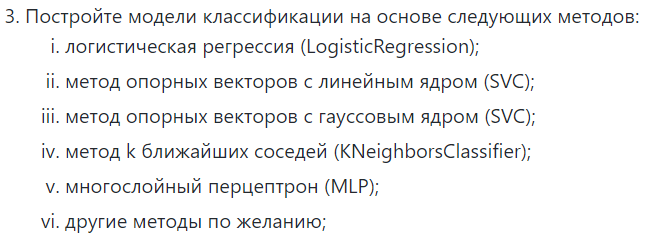

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None, n_jobs = 1, train_sizes = np.linspace(.05, 1., 20), verbose = 0, plot = True):
    """
         Draw the learning curve of data on a model.
         Parameter explanation
    ----------
         estimator: The classifier you use.
         title: The title of the table.
         X: input feature, numpy type
         y: input target vector
         ylim: (ymin, ymax) in tuple format, set the lowest point and highest point of the ordinate in the image
         cv: When doing cross-validation, the data is divided into the number of copies, one of which is used as the cv set, and the remaining n-1 copies are used as training (default is 3 copies)
         n_jobs: the number of parallel tasks (default 1)
    """
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, 
                                                            cv = cv, 
                                                            n_jobs = n_jobs, 
                                                            train_sizes = train_sizes, 
                                                            verbose = verbose)
 
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
 
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"train_sample")
        plt.ylabel(u"score")
        plt.gca().invert_yaxis()
        plt.grid()

 
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha = 0.1, color = "b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha = 0.1, color = "r")
        plt.plot(train_sizes, train_scores_mean, '-', color = "r", label = u"train_score")
        plt.plot(train_sizes, test_scores_mean, '.-', color = "g", label = u"cross_validation_score")
        plt.gca().invert_yaxis()
        plt.legend(loc = "best")
 
        plt.draw()
        plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Определяем методы

learning_models = {
    "LogisticRegression": LogisticRegression(),
    "Метод опорных векторов с линейным ядром (SVC)": svm.SVC(kernel = 'linear'),
    "Метод опорных векторов с гауссовым ядром (SVC)": svm.SVC(kernel = 'rbf'),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors = 100),
    "Многослойный перцептрон (MLP)": MLPClassifier(max_iter = 200),
}

y_test_predict = dict()
i = 0
for name, model in learning_models.items():
    start_time = time.time()
    model.fit(x_train, y_train)
    print(f"{(time.time() - start_time)} seconds время обучения модели {name}")
    # Строим кривые обучения для каждой модели

    #if name != "Многослойный перцептрон (MLP)":
    #    train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, train_sizes = [3, 6, 10], cv = 3)
    #    plot_learning_curve(model, name, x_train, y_train)                 

    y_test_predict[name] = model.predict(x_test)
    df_differences.loc[i] = [name,
                         accuracy_score(y_test, model.predict(x_test)),
                         precision_score(y_test, model.predict(x_test), average = 'macro'),
                         recall_score(y_test, model.predict(x_test), average = 'macro'),
                         f1_score(y_test, model.predict(x_test), average = 'macro')]
    i += 1                

80.29052186012268 seconds время обучения модели LogisticRegression
211.98511457443237 seconds время обучения модели Метод опорных векторов с линейным ядром (SVC)
350.4603750705719 seconds время обучения модели Метод опорных векторов с гауссовым ядром (SVC)
0.013362646102905273 seconds время обучения модели KNeighborsClassifier
1781.3317081928253 seconds время обучения модели Многослойный перцептрон (MLP)


**4. Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;**

In [ ]:
df_differences

,Тип модели классификации,Accuracy_score,Precision_score,Recall_score,F1_score
0,LogisticRegression,0.719629,0.724364,0.710080,0.709928
1,Метод опорных векторов с линейным ядром (SVC),0.716446,0.724747,0.707959,0.710435
2,Метод опорных векторов с гауссовым ядром (SVC),0.715915,0.734683,0.705536,0.707189
3,KNeighborsClassifier,0.066313,0.190187,0.061806,0.039949
4,Многослойный перцептрон (MLP),0.758355,0.758411,0.750971,0.752614
